#### Import libraries

In [3]:
import xarray as xr 
import matplotlib.pyplot as plt

#### Read the dataset 

In [4]:
import os

os.getcwd()

'/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/4.-Split_Data_Can_Pen'

In [5]:
path = '/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/'
path_in = '3.-data_with_NAN_values_corrected/'
data_infile = 'era5SL_010_240x240_m_s_2011_2021.nc'
# mask_infile = 'mask_aemet_daily-wind_2011-2021_010x010_240.nc'

ds_data = xr.open_dataset(path + path_in + data_infile)
# ds_mask = xr.open_dataset(path + path_in + mask_infile)

In [6]:
ds_data

<xarray.Dataset> Size: 22GB
Dimensions:    (time: 96432, latitude: 240, longitude: 240)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 771kB 2011-01-01 ... 2021-12-31T23:00:00
  * latitude   (latitude) float64 2kB 48.9 48.8 48.7 48.6 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 2kB -19.0 -18.9 -18.8 -18.7 ... 4.7 4.8 4.9
    expver     (time) <U4 2MB ...
Data variables:
    ws         (time, latitude, longitude) float32 22GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...

#### Information of the dataset

In [10]:
print(ds_data)
print()
# print(ds_mask)

<xarray.Dataset> Size: 22GB
Dimensions:    (time: 96432, latitude: 240, longitude: 240)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 771kB 2011-01-01 ... 2021-12-31T23:00:00
  * latitude   (latitude) float64 2kB 48.9 48.8 48.7 48.6 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 2kB -19.0 -18.9 -18.8 -18.7 ... 4.7 4.8 4.9
    expver     (time) <U4 2MB ...
Data variables:
    ws         (time, latitude, longitude) float32 22GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...



#### Split the data (in longitud and latitud) to retrive only peninsula and balears data

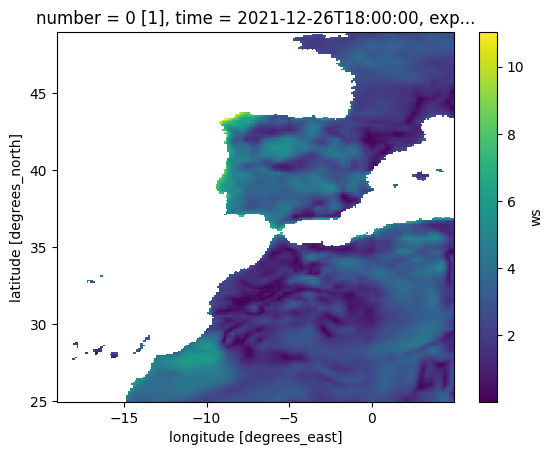

In [11]:
ds_data.isel(time=-126)["ws"].plot()

In [20]:
#This are the more close coordenates:
#ds_data_p = ds_data.sel(latitude=slice(44.0, 35.0))
#ds_data_p = ds_data_p.sel(longitude=slice(-10.0, 4.9))

#ds_mask_p = ds_mask.sel(latitude=slice(44.0, 35.0))
#ds_mask_p = ds_mask_p.sel(longitude=slice(-10.0, 4.9))

#ds_data_c = ds_data.sel(latitude=slice(30.0, 27.0))
#ds_data_c = ds_data_c.sel(longitude=slice(-20.0, -13))

#ds_mask_c = ds_mask.sel(latitude=slice(30.0, 27.0))
#ds_mask_c = ds_mask_c.sel(longitude=slice(-20.0, -13))

# This are the coordinates used by Nuria:
ds_data_p = ds_data.sel(latitude=slice(45.9, 31.5), longitude=slice(-9.8, 4.6))
#ds_data_p = ds_data_p.sel(longitude=slice(-9.8, 4.5))


ds_data_c = ds_data.sel(latitude=slice(30.5, 25.0))
ds_data_c = ds_data_c.sel(longitude=slice(-18.8, -13.2))

In [21]:
print('Data pen shape: ', ds_data_p.dims)
print('Data can shape: ', ds_data_c.dims)

Data pen shape:  FrozenMappingWarningOnValuesAccess({'time': 96432, 'latitude': 144, 'longitude': 144})
Data can shape:  FrozenMappingWarningOnValuesAccess({'time': 96432, 'latitude': 56, 'longitude': 56})


In [22]:
print(ds_data_p)

<xarray.Dataset> Size: 8GB
Dimensions:    (time: 96432, latitude: 144, longitude: 144)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 771kB 2011-01-01 ... 2021-12-31T23:00:00
  * latitude   (latitude) float64 1kB 45.9 45.8 45.7 45.6 ... 31.8 31.7 31.6
  * longitude  (longitude) float64 1kB -9.8 -9.7 -9.6 -9.5 ... 4.2 4.3 4.4 4.5
    expver     (time) <U4 2MB ...
Data variables:
    ws         (time, latitude, longitude) float32 8GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...


In [23]:
print(ds_data_c)

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 96432, latitude: 56, longitude: 56)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 771kB 2011-01-01 ... 2021-12-31T23:00:00
  * latitude   (latitude) float64 448B 30.5 30.4 30.3 30.2 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 448B -18.8 -18.7 -18.6 ... -13.5 -13.4 -13.3
    expver     (time) <U4 2MB ...
Data variables:
    ws         (time, latitude, longitude) float32 1GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...


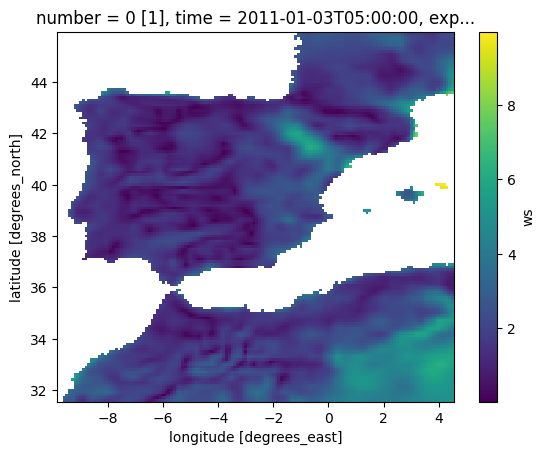

In [24]:
ds_data_p.isel(time=53)["ws"].plot()

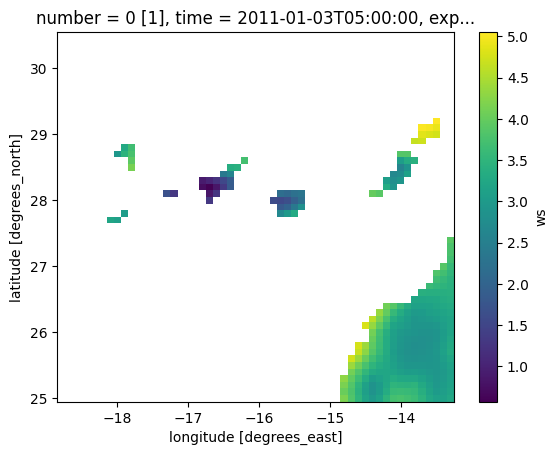

In [27]:
ds_data_c.isel(time=53)["ws"].plot()

#### Information of the dataset

In [28]:
print(ds_data)


<xarray.Dataset> Size: 22GB
Dimensions:    (time: 96432, latitude: 240, longitude: 240)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 771kB 2011-01-01 ... 2021-12-31T23:00:00
  * latitude   (latitude) float64 2kB 48.9 48.8 48.7 48.6 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 2kB -19.0 -18.9 -18.8 -18.7 ... 4.7 4.8 4.9
    expver     (time) <U4 2MB ...
Data variables:
    ws         (time, latitude, longitude) float32 22GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...


In [29]:
ws_data_p = ds_data_p["ws"]
ws_data_c = ds_data_c["ws"]

#### Check for Nan values

#### Peninsula

In [30]:
print(ws_data_p)

<xarray.DataArray 'ws' (time: 96432, latitude: 144, longitude: 144)> Size: 8GB
[1999613952 values with dtype=float32]
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 771kB 2011-01-01 ... 2021-12-31T23:00:00
  * latitude   (latitude) float64 1kB 45.9 45.8 45.7 45.6 ... 31.8 31.7 31.6
  * longitude  (longitude) float64 1kB -9.8 -9.7 -9.6 -9.5 ... 4.2 4.3 4.4 4.5
    expver     (time) <U4 2MB ...


In [31]:
print("total ws_data: ", ws_data_p.shape[0] * ws_data_p.shape[1] * ws_data_p.shape[2])
print("Non zero values: ", (ws_data_p > 0.).sum().item())
print("Zero values: ", (ws_data_p == 0).sum().item())
print("Non-null ws_data (0 + other): ", ws_data_p.count().item())
print("Nan values: ", (ws_data_p.isnull()).sum().item())

print("Rate: ")
print("Null ws_data", (ws_data_p.isnull().sum() * 100 / (ws_data_p.shape[0] * ws_data_p.shape[1] * ws_data_p.shape[2])).item())
print("Non-null ws_data: ", (ws_data_p.count() *  100 / (ws_data_p.shape[0] * ws_data_p.shape[1] * ws_data_p.shape[2])).item())

total ws_data:  1999613952
Non zero values:  1288042224
Zero values:  0
Non-null ws_data (0 + other):  1288042224
Nan values:  711571728
Rate: 
Null ws_data 35.58545524691358
Non-null ws_data:  64.41454475308642


#### Canarias

In [32]:
print(ws_data_c)

<xarray.DataArray 'ws' (time: 96432, latitude: 56, longitude: 56)> Size: 1GB
[302410752 values with dtype=float32]
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 771kB 2011-01-01 ... 2021-12-31T23:00:00
  * latitude   (latitude) float64 448B 30.5 30.4 30.3 30.2 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 448B -18.8 -18.7 -18.6 ... -13.5 -13.4 -13.3
    expver     (time) <U4 2MB ...


In [33]:
print("total ws_data: ", ws_data_c.shape[0] * ws_data_c.shape[1] * ws_data_c.shape[2])
print("Non zero values: ", (ws_data_c > 0.).sum().item())
print("Zero values: ", (ws_data_c == 0).sum().item())
print("Non-null ws_data (0 + other): ", ws_data_c.count().item())
print("Nan values: ", (ws_data_c.isnull()).sum().item())

print("Rate: ")
print("Null ws_data", (ws_data_c.isnull().sum() * 100 / (ws_data_c.shape[0] * ws_data_c.shape[1] * ws_data_c.shape[2])).item())
print("Non-null ws_data: ", (ws_data_c.count() *  100 / (ws_data_c.shape[0] * ws_data_c.shape[1] * ws_data_c.shape[2])).item())

total ws_data:  302410752
Non zero values:  29508192
Zero values:  0
Non-null ws_data (0 + other):  29508192
Nan values:  272902560
Rate: 
Null ws_data 90.24234693877551
Non-null ws_data:  9.75765306122449


#### Save the data and mask 

In [ ]:
path_out = '4.-Split_Data_Can_Pen/'
name_outfile_data_p = 'era5SL_010_144x144_m_s_2011_2021_pen.nc'
name_outfile_data_c = 'era5SL_010_56x56_m_s_2011_2021_can.nc'

ds_data_p.to_netcdf(path + path_out + name_outfile_data_p)
# ds_mask_p.to_netcdf(path + path_out + name_outfile_mask_p)
ds_data_c.to_netcdf(path + path_out + name_outfile_data_c)
# ds_mask_c.to_netcdf(path + path_out + name_outfile_mask_c)